# Project: TMDb movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#clean">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [387]:
#This cell is used to set up import statements for all of the packages that I plan to use.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section, the data will be loaded, and checked for cleanliness.


In [388]:
#The data from csv file is loaded. Few operations are performed to inspect data 
#types and look for instances of missing or possibly errant data.

#Here, one can see certain columns such as 'cast', 'genres', and 'production companies' have
#multiple values separated by pipe | characters.
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2006-09-15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08


In [389]:
df.shape #In total, there are 10866 rows and 21 columns.

(10866, 21)

In [390]:
df.describe() 
#From here one can see, the popularity contains some outliers such 32.99, since the 50% of the values are around 0.4. 
#Budget_adj, Revenue_adj, Runtime contains zero values for some rows. 
#The release year is between 1960 till 2015.


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [391]:
df.info() 
#The null values exist in many columns. Some columns such as homepage and tagline are not important, 
#while cast, director, genre are important columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

<a id='clean'></a>
## Data Cleaning 


In [392]:
#Data Cleaning Task #1: First, we need to get rid of unnecessary columns.
#Please note, budget and renevue columns are deleted but budget_adj and revenue_adj are kept. 
#This is because later options have adjusted considering inflation. 
#So when comparing data from 1930 with 2000, both exhibit the same matrics.

unused_col=[ 'id', 'imdb_id', 'budget','revenue', 'tagline','homepage', 'keywords', 'overview']
df.drop(unused_col,axis=1,inplace=True)
df.head(1)


,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2006-09-15,5562,6.5,2015,137999939.3,1.392446e+09


In [393]:
#Data Cleaning Task 2: Changing format of budget and revenue column from float to int.
change_type = ['budget_adj','revenue_adj']
df[change_type]=df[change_type].astype(np.int64)
df[change_type].dtypes

budget_adj     int64
revenue_adj    int64
dtype: object

In [394]:
#Data Cleaning Task 3: Let's check if there are any rows with duplicate values.
df.duplicated().sum()
#There is one row with duplicate values. Let's drop that row.
df.drop_duplicates(keep='first', inplace=True)
df.shape

(10865, 13)

In [395]:
#From our data wrangling step, we noticed, columns with string values such as 'cast', 'director' 
#and 'genres' contain null values. And there are only few rows of them. 
#Therefore, it is best to drop them.
#Data Cleaning Task 4: Drop null values in columns (cast, director, genres)

null_drop_columns = ['cast','director','genres']

df.dropna(subset=[null_drop_columns],inplace=True)

df.isnull().sum()

popularity                0
original_title            0
cast                      0
director                  0
runtime                   0
genres                    0
production_companies    959
release_date              0
vote_count                0
vote_average              0
release_year              0
budget_adj                0
revenue_adj               0
dtype: int64

In [396]:
#Data Cleaning Task 5: Replace zero with NAN in 'budget_adj','revenue_adj','runtime' columns

df.describe()
#Here one can notice, there are some movies with 0 budget, 0 revenue and 0 runtime. Let's explore this.


,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10731.000000,10731.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04
mean,0.652615,102.468829,219.812972,5.964710,2001.259622,1.776530e+07,5.200623e+07
std,1.004804,30.493873,578.815324,0.930283,12.820151,3.446630e+07,1.454252e+08
min,0.000188,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.210765,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.387081,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.720889,112.000000,148.000000,6.600000,2011.000000,2.110885e+07,3.470546e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [397]:
df_budget_zero = df.query('budget_adj == 0')
df_revenue_zero = df.query('revenue_adj==0')
df_runtime_zero = df.query('runtime==0')

df_budget_zero.shape, df_revenue_zero.shape, df_runtime_zero.shape

#One can notice, there are many rows with zero budget, zero revenue but few zero runtime values.
#If we keep them as zero, then it would affect our numerical statistics.
#Therefore, it would be better to rplae all the values from '0' to NAN in the list.


((5580, 13), (5888, 13), (28, 13))

In [398]:
#Here, we will replae all the values in budget_adj, revenue_adj and runtime from '0' to NAN in the list.
#But for runtime_zero, we can drop them.

df['budget_adj']= df['budget_adj'].replace(0,np.NAN)
df['revenue_adj']=df['revenue_adj'].replace(0,np.NAN)
df['runtime']=df['runtime'].replace(0,np.NAN)

#Data Cleaning Task 6: Drop null values from 'runtime' column
df.dropna(subset=['runtime'],inplace=True)

df.shape


(10703, 13)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: Relationship among dependent variables

Text(0.5,1,'Popularity vs Revenue Levels')

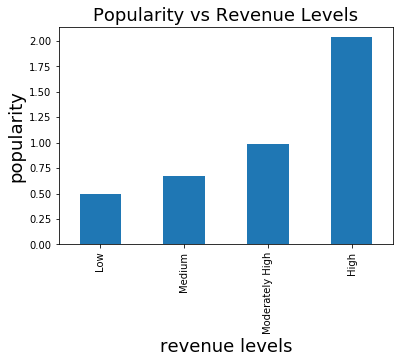

In [399]:
#There are about 10,000 data points. It is not possible to find clear trend if we use 10,000 data points directly.
#Therefore, either we brake down data points into different groups or just look at 100 Top movies and 100 Worst movies.
#Dependent variables are revenue_adj, popularity, and vote average. Independent variables are Runtime, Budget_adj, Cast, Director,
#Genre, production companies and movie titles.

#We will start with exploring relationship among the dependent variables.

# quartile function
def cut_into_quantile(dfname ,column_name):
# find quartile, max and min values
    min_value = dfname[column_name].min()
    first_quantile = dfname[column_name].describe()[4]
    second_quantile = dfname[column_name].describe()[5]
    third_quantile = dfname[column_name].describe()[6]
    max_value = dfname[column_name].max()
# Bin edges that will be used to "cut" the data into groups
    bin_edges = [ min_value, first_quantile, second_quantile, third_quantile, max_value]
# Labels for the four budget level groups
    bin_names = [ 'Low', 'Medium', 'Moderately High', 'High'] 
# Creates budget_levels column
    name = '{}_levels'.format(column_name)
    dfname[name] = pd.cut(dfname[column_name], bin_edges, labels=bin_names, include_lowest = True)
    return dfname


cut_into_quantile(df,'revenue_adj')

df.groupby('revenue_adj_levels')['popularity'].mean().plot(kind='bar')

plt.xlabel('revenue levels',fontsize=18)
plt.ylabel('popularity',fontsize=18)
plt.title('Popularity vs Revenue Levels',fontsize=18 )

#This shows that popularity is directly proportional to revenue.

Text(0.5,1,'Vote Average vs Revenue Levels')

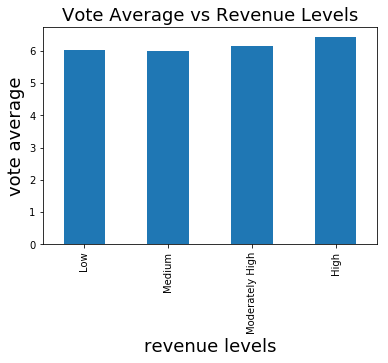

In [400]:
df.groupby('revenue_adj_levels')['vote_average'].mean().plot(kind='bar')

plt.xlabel('revenue levels',fontsize=18)
plt.ylabel('vote average',fontsize=18)
plt.title('Vote Average vs Revenue Levels', fontsize=18)

#There is no clear trend between vote average and revenue.

### Research Question 2: Impact of Budget on Dependent Variables

Text(0.5,1,'Popularity vs Budget')

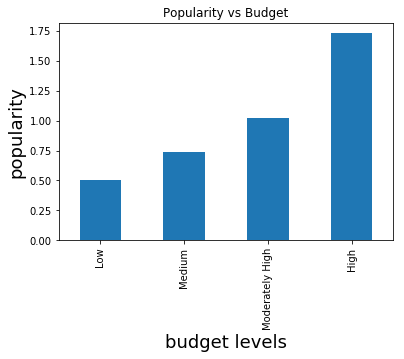

In [401]:
#Here we will explore the impact of budget on dependent variables such as popularity, revenue, and vote average.
# quartile function

cut_into_quantile(df,'budget_adj')

df.groupby('budget_adj_levels')['popularity'].mean().plot(kind='bar')

plt.xlabel('budget levels',fontsize=18)
plt.ylabel('popularity',fontsize=18)
plt.title('Popularity vs Budget')

#Conclusion:
#This shows that popularity is directly proportional to budget.
#Higher the budget of the movie means more popular the movie will be.



Text(0.5,1,'Net Profit vs Budget')

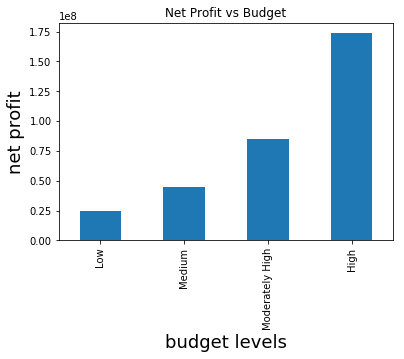

In [402]:
df['net_profit']=df['revenue_adj']-df['budget_adj']
df.groupby('budget_adj_levels')['net_profit'].mean().plot(kind='bar')

plt.xlabel('budget levels',fontsize=18)
plt.ylabel('net profit',fontsize=18)
plt.title('Net Profit vs Budget')

#The budget has strong impact on net profit of the movie.
#The highet the budget of the movie, the more net profit is.

Text(0.5,1,'vote average vs Budget')

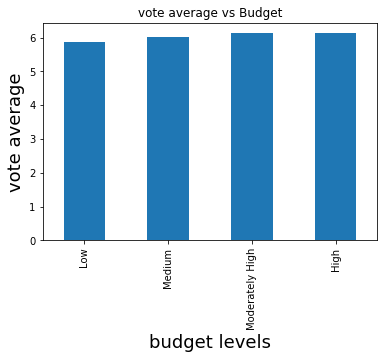

In [403]:
df.groupby('budget_adj_levels')['vote_average'].mean().plot(kind='bar')

plt.xlabel('budget levels',fontsize=18)
plt.ylabel('vote average',fontsize=18)
plt.title('vote average vs Budget')

#The budget has no impact on the vote average.

### Research Question 3: Impact of Runtime on Popularity,Net Profit and Vote Average 

Text(0.5,1,'Popularity vs Runtime')

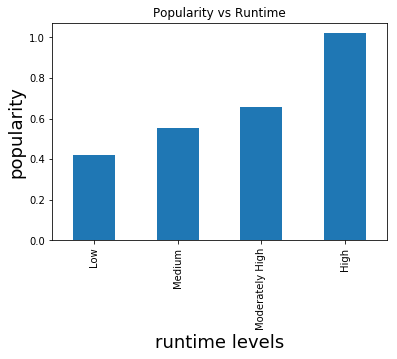

In [404]:
#Here we will explore the impact of Runtime on dependent variables such as popularity, revenue, and vote average.
# quartile function
cut_into_quantile(df,'runtime')

df.groupby('runtime_levels')['popularity'].mean().plot(kind='bar')

plt.xlabel('runtime levels',fontsize=18)
plt.ylabel('popularity',fontsize=18)
plt.title('Popularity vs Runtime')

#Conclusion:
#This shows that popularity is directly proportional to runtime.
#Longer the movie means more popular the movie will be.


count    10703.000000
mean       102.736896
std         30.079331
min          3.000000
25%         90.000000
50%         99.000000
75%        112.000000
max        900.000000
Name: runtime, dtype: float64

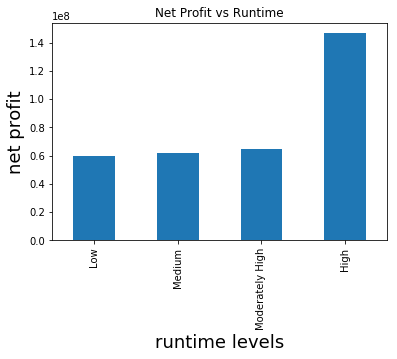

In [405]:
df.groupby('runtime_levels')['net_profit'].mean().plot(kind='bar')

plt.xlabel('runtime levels',fontsize=18)
plt.ylabel('net profit',fontsize=18)
plt.title('Net Profit vs Runtime')

df['runtime'].describe()

#The movies with runtime from 5 mins till 112 mins, seem to exhibit similar net profit.
#However, the movie with runtime from 112 mins till 900 mins, exhibit the highest net profit.
#From here, one can coclude that to ensure higher net profit, the runtime of the movie should atleast be 112 minutes.


runtime_levels
Low                5.726425
Medium             5.724355
Moderately High    6.044946
High               6.401297
Name: vote_average, dtype: float64

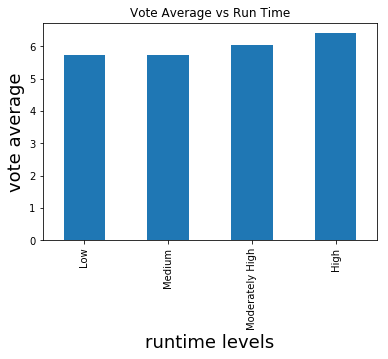

In [406]:
df.groupby('runtime_levels')['vote_average'].mean().plot(kind='bar')

plt.xlabel('runtime levels',fontsize=18)
plt.ylabel('vote average',fontsize=18)
plt.title('Vote Average vs Run Time')

df.groupby('runtime_levels')['vote_average'].mean()

#The runtime levels does have a positive impact on the vote average.
#However, the impact is relatively small, 
#meaning the difference between the lowest runtime and highest runtime has only the vote average difference of 0.9.

### Research Question 4: Best 5 and Worst 5 Cast, Directors, Genres, Producers, based on Net Profit, Popularity and Vote Average

In [407]:
#First, we will divide net profit, popularity, vote_average into four quarters. 
#This way, we can extract highest and lowest performing movies.

cut_into_quantile(df,'net_profit').head(1)
cut_into_quantile(df,'popularity').head(1)
cut_into_quantile(df,'vote_average').head(1)


,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue_adj_levels,budget_adj_levels,net_profit,runtime_levels,net_profit_levels,popularity_levels,vote_average_levels
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2006-09-15,5562,6.5,2015,137999939.0,1.392446e+09,High,High,1.254446e+09,High,High,High,Moderately High


In [408]:
#Best performing movies are filtered by "High" net_profit_level, "High" popularity level and "High" vote average level.
df_np_high = df.query('net_profit_levels == "High" and popularity_levels == "High" and vote_average_levels=="High"')

In [409]:
#Worst performing movies are filtered by "Low" net_profit_level, "Low" popularity level and "Low" vote average level.
df_np_low = df.query('net_profit_levels == "Low" and popularity_levels == "Low" and vote_average_levels=="Low"')

In [410]:
# split pipe characters and count their number of appeared times
#argument:dataframe_col is the target dataframe&column; num is the number of the top factor
def find_top(dataframe_col, num=5):
    # split the characters in the input column 
    #and make it to a list
    alist = dataframe_col.str.cat(sep='|').split('|')
    #transfer it to a dataframe
    new = pd.DataFrame({'top' :alist})
    #count their number of appeared times and
    #choose the top5
    top = new['top'].value_counts().head(num)
    return top

In [411]:
#find top five cast
a = find_top(df_np_high.cast)

#find top five director
b=find_top(df_np_high.director)

#find top five genres
c = find_top(df_np_high.genres)

#find top five production companies
d=find_top(df_np_high.production_companies)

In [412]:
df_popular = pd.DataFrame({'popular_cast': a.index, 'popular_director': b.index, 'popular_genres': c.index, 'popular_producer': d.index})
df_popular

,popular_cast,popular_director,popular_genres,popular_producer
0,Tom Hanks,Steven Spielberg,Drama,Warner Bros.
1,Brad Pitt,Clint Eastwood,Action,Universal Pictures
2,Tom Cruise,Robert Zemeckis,Adventure,Paramount Pictures
3,Leonardo DiCaprio,Quentin Tarantino,Thriller,Twentieth Century Fox Film Corporation
4,Harrison Ford,Peter Jackson,Comedy,Walt Disney Pictures


In [413]:
#find worst five cast
a_low = find_top(df_np_low.cast)

#find worst five director
b_low=find_top(df_np_low.director)

#find worst five genres
c_low = find_top(df_np_low.genres)

#find worst five production companies
d_low=find_top(df_np_low.production_companies)

In [414]:
df_unpopular = pd.DataFrame({'unpopular_cast': a_low.index, 'unpopular_director': b_low.index, 'unpopular_genres': c_low.index, 'unpopular_producer': d_low.index})
df_unpopular
#please note that 20th Century Fox is same as Twentieth Century Fox Film Corporation.

,unpopular_cast,unpopular_director,unpopular_genres,unpopular_producer
0,Luke Wilson,Gary Goldman,Comedy,Warner Bros.
1,Tim Roth,David Chase,Drama,Franchise Pictures
2,Catherine O'Hara,Robert Iscove,Romance,Universal Pictures
3,Laraine Newman,Renny Harlin,Action,TriStar Pictures
4,Oliver Platt,Dick Maas,Thriller,20th Century Fox


### Research Question 5: Year of Release, impact on Popularity and Genre

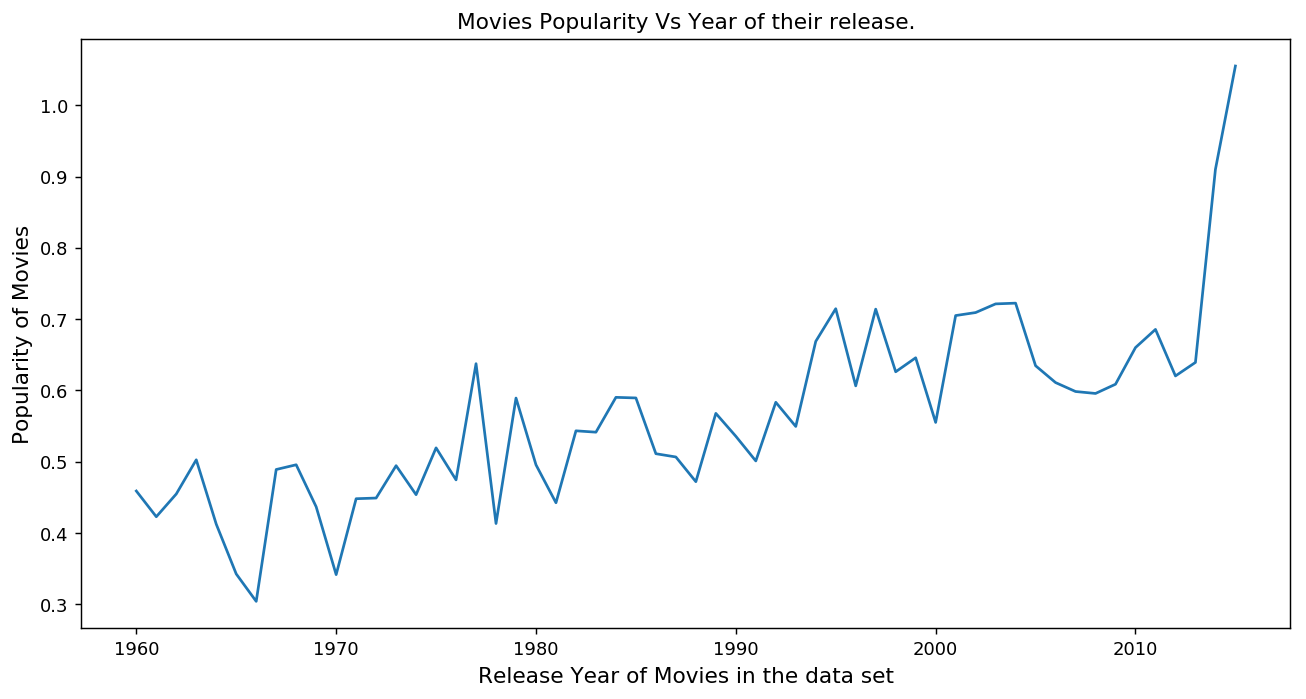

In [415]:
#We will be using Line plot for this analysis
#Here, we will explor the popularity of the movie with respect to time.

popularity_mean = df.groupby('release_year')['popularity'].mean()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Popularity of Movies', fontsize = 12)
#title of the line plot
plt.title('Movies Popularity Vs Year of their release.')

#plotting the graph
plt.plot(popularity_mean)

#displaying the line plot
plt.show()

#Conclusion: One can see from the below plot, that movies' popularity is increasing with time. 

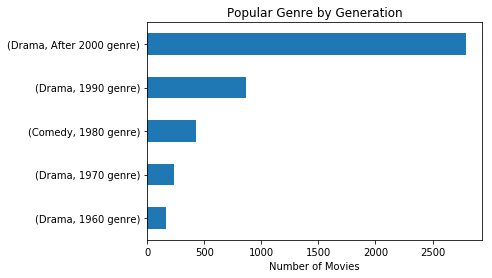

In [416]:
df_year_1 = df.query('release_year >=1960 and release_year < 1970')

df_year_2 = df.query('release_year >=1970 and release_year < 1980')

df_year_3 = df.query('release_year >=1980 and release_year < 1990')

df_year_4 = df.query('release_year >=1990 and release_year < 2000')

df_year_5 = df.query('release_year >=2000 and release_year < 2015')

year_1_genre = find_top(df_year_1.genres,1)

year_2_genre = find_top(df_year_2.genres,1)

year_3_genre = find_top(df_year_3.genres,1)

year_4_genre = find_top(df_year_4.genres,1)

year_5_genre = find_top(df_year_5.genres,1)

df_genre_years = pd.DataFrame({'1960 genre': year_1_genre, '1970 genre': year_2_genre, '1980 genre': year_3_genre, '1990 genre': year_4_genre,'After 2000 genre': year_5_genre })
df_genre_years
#df_genre_years.plot(kind='bar')

genre_years = df_genre_years.stack().sort_values().plot.barh()

genre_years.set(title='Popular Genre by Generation')

genre_years.set_xlabel('Number of Movies')

plt.show()

#Conclusion: Drama Genre is most popular in 1960s, 1970s, 1990s and after 2000s. Comedy Genre is most popular in 1980s.

### Research Question 6: Top 5 movies by net profit, popularity and vote_average 

In [417]:
#Here we will explore the top 5 movies, filtered by highest net profit earned.
df.sort_values(by=['net_profit'],ascending=False).original_title.head(5).reset_index(drop=True)

0       Star Wars
1          Avatar
2         Titanic
3    The Exorcist
4            Jaws
Name: original_title, dtype: object

In [418]:
#Here we will explore the top 5 movies, filtered by highest popularity earned.
df.sort_values(by=['popularity'],ascending=False).original_title.head(5).reset_index(drop=True)

0             Jurassic World
1         Mad Max: Fury Road
2               Interstellar
3    Guardians of the Galaxy
4                  Insurgent
Name: original_title, dtype: object

In [419]:
#Here we will explore the top 5 movies, filtered by highest vote_average earned.
df.sort_values(by=['vote_average'],ascending=False).original_title.head(5).reset_index(drop=True)

0                        The Story of Film: An Odyssey
1                        Black Mirror: White Christmas
2                                    Pink Floyd: Pulse
3                  Dave Chappelle: Killin' Them Softly
4    A Personal Journey with Martin Scorsese Throug...
Name: original_title, dtype: object

<a id='conclusions'></a>
## Conclusions
Following conclusions can be made from this movie dataset.

1) We explored the relationships between the dependent variables. From here, we discovered that popularity is directly proportional to revenue. But, there is no clear trend between vote average and revenue.

2) Secondly, we explored the impact of budget on dependent variables. The budget of the movie affects very positively on the net profit and popularity of the movie. But the budget has no impact on the vote average.

3) Next, we explored the impact of runtime on dependent variables. Popularity of the movie is directly proportional to the runtime. In order to ensure higher profits, the runtime of the movie should atleast be 112 minutes.The impact of runtime on vote average is relatively small.

4) We explored the cast, directors, genres and producers present in the best and worst performing movies.From this analysis, we do not get clear results on genres and producer. Some genres and producers are found in both best and worst performing movies.

    1) Cast: Tom Hanks, Brad Pitt, Leonardo DiCaprio, Tom Cruise, Samuel Jackson are present in the best performing movies. While Luke Wilson, Tim Roth, Catherine O'Hara, Laraine and Oliver Platt are present in the worst performing movies.

    2) Director: Steven Spielberg, Clint Eastwood, Robert Zemeckis, Quentin Tarantino and Peter Jackson have directed the best performing movies.While Gary Goldman, David Chase, Robert Iscove, Renny Harlin and Dick Maas have directed the worst performing movies.

    3) Genres: It is unclear on specific genres that provide the best or worst performing movies. This is because Comedy, Drama, Action and Thriller Genres are present in both best and worst performing movies. While, Adventure Genre is one of the best genre, while Romance is one the worst genre.

    4) Producers: Again, it is not very clear on producers, who produce best or worst movies. For example, Warner Bros, Universal Pictures and 20th Century Fox have produced both the best and worst performing movies. While, Paramount Pictures and Walt Disney have produced the best performing movies. Franchise Pictures and TriStar Pictures have produced the worst performing movies.

5) We also explored how the release year impact the popularity of the movie and the genre. We discovered that, Drama Genre is most popular in 1960s, 1970s, 1990s and after 2000s. Comedy Genre is most popular in 1980s. In addition, The movies' popularity is increasing with time. 

6) The top 5 movies by net profit, popularity and vote_average are as following. 
    1) Net Profit --> Star Wars, Avatar, Titanic, The Exorcist, Jaws
    2) Popularity --> Jurassic World, Mad Max: Fury Road, Interstellar, Guardians of the Galaxy, Insurgent
    3) Vote Average --> The Story of Film: An Odyssey, The Mask You Live In, Black Mirror: White Christmas,Life Cycles, Pink  Floyd: Pulse.
    
## Limitations 
1) Initially, we had 10866 data, but we decided to take out null values from certain columns. Therefore, we ended up with 10703 data points. It would have been better to use internet to fill out the missing rows, instead of deleting them.
    
2) This dataset has missing units, specially for popularity, budget and revenue. It is not clear if all the values in the budget and revenue columns represent the same currency. 
    
3) For the popularity, the maximum value is 32.99, while most values are present in between 0.2 and 0.7. It would have been better to take out the outliers, not only from the popularity column but also from other columns.
    
4) We replaced zero values with null values in the budget_adj and revenue_adj columns. It would have been better to fill out these values by finding the information from the internet. This way, we might have gotten more clearer understanding of the impact of budget and revenue on other parameters.

## References
1) https://medium.com/@onpillow/01-investigate-tmdb-movie-dataset-python-data-analysis-project-part-1-data-wrangling-3d2b55ea7714

2) https://medium.com/@onpillow/02-investigate-tmdb-movie-dataset-python-data-analysis-project-part-2-exploratory-data-4839f697092

3) https://github.com/antra0497/Udacity--Project-Investigate-TMDB-Movies-Dataset/blob/master/.ipynb_checkpoints/investigate-a-dataset-template-checkpoint.ipynb


In [420]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0